## Curse of dimensionality example. 

First try simulated data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from sklearn.neighbors import NearestNeighbors

In [4]:
# Generate uniform random numbers in [0, 1]
X = np.random.uniform(0, 1, size=(100, 5))  
X.shape

(100, 5)

Text(0, 0.5, 'Predictor value')

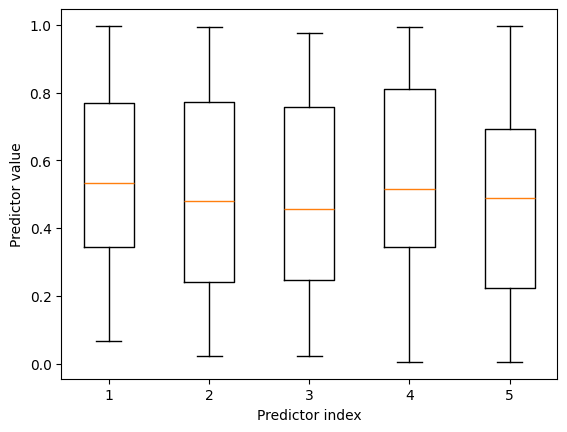

In [5]:
plt.boxplot(X, manage_ticks=False)
plt.xlabel("Predictor index")
plt.ylabel("Predictor value")

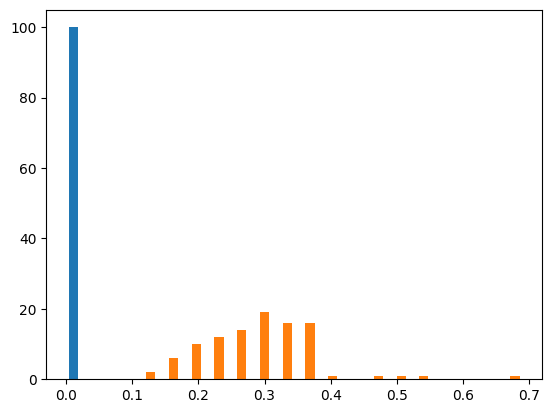

In [12]:
nnbr = NearestNeighbors()
nnbr.fit(X)   
nnbr.kneighbors(X)
distances, indices = nnbr.kneighbors(X, n_neighbors=2)
plt.hist(distances, bins=20)
plt.show()
  

In [7]:
np.mean(distances[ :, 1]) 

0.2860340669969019

### Now try with the `cancer` data

All the predictors are numerical


In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [83]:
cancer.data.shape

(569, 30)

### Minmax scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cancer.data)

Text(0, 0.5, 'Feature magnitude')

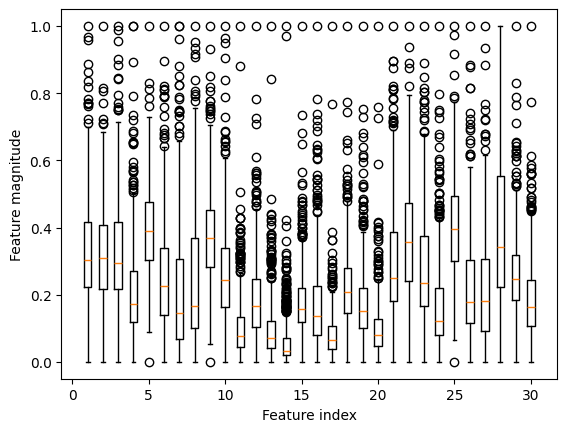

In [71]:
plt.boxplot(X_scaled, manage_ticks=False)
#plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

(array([ 36., 112., 172.,  77.,  66.,  31.,  23.,  14.,  14.,   4.,   1.,
          6.,   1.,   3.,   3.,   2.,   1.,   0.,   1.,   2.]),
 array([0.00402173, 0.01671816, 0.0294146 , 0.04211104, 0.05480747,
        0.06750391, 0.08020035, 0.09289679, 0.10559322, 0.11828966,
        0.1309861 , 0.14368253, 0.15637897, 0.16907541, 0.18177184,
        0.19446828, 0.20716472, 0.21986116, 0.23255759, 0.24525403,
        0.25795047]),
 <BarContainer object of 20 artists>)

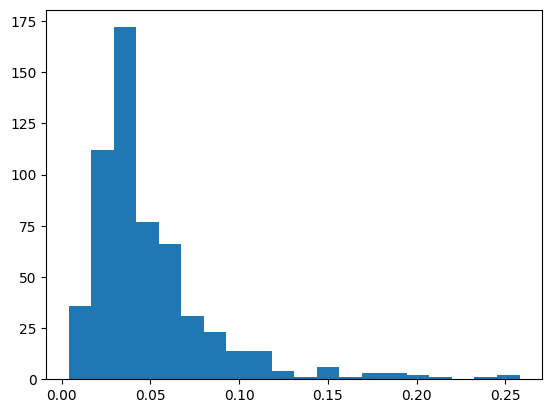

In [87]:
X_scaled_par = X_scaled[:, :5]  

nnbr = NearestNeighbors()
nnbr.fit(X_scaled_par)
nnbr.kneighbors(X_scaled_par)
distances, indices = nnbr.kneighbors(X_scaled_par, n_neighbors=2)
plt.hist(distances[:, 1], bins=20)